In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando as bibliotecas necessárias para a análise.

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importando o Google Drive, pois é onde o conjunto de dados está armazenado.

In [105]:
df = pd.read_csv('/content/drive/MyDrive/dados_rh.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Realizando uma verificação preliminar do conjunto de dados antes de qualquer tratamento.

In [106]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


Verificando os tipos de dados presentes em cada coluna.

In [107]:
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Conferindo se todas as colunas estão completamente preenchidas.

In [108]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Analisando as primeiras 10 entradas para ter uma visão geral do conjunto de dados que será trabalhado.

In [109]:
df = df.drop(labels=['EmployeeCount'], axis=1)
df = df.drop(labels=['StandardHours'], axis=1)
df = df.drop(labels=['Over18'], axis=1)

Removendo algumas colunas que não serão utilizadas na análise.

In [110]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Examinando algumas estatísticas importantes, como média, máximo e mínimo.

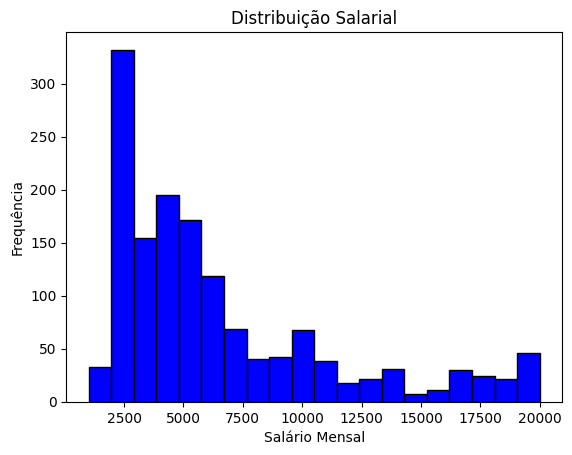

In [111]:
mediaSalarial = df['MonthlyIncome'].mean()
plt.hist(df['MonthlyIncome'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuição Salarial')
plt.xlabel('Salário Mensal')
plt.ylabel('Frequência')
plt.show()

Aqui está o gráfico de barras que exibe a distribuição salarial por cargo:

* A maior frequência está em torno de 2500.
* Conforme o salário aumenta, a frequência diminui.

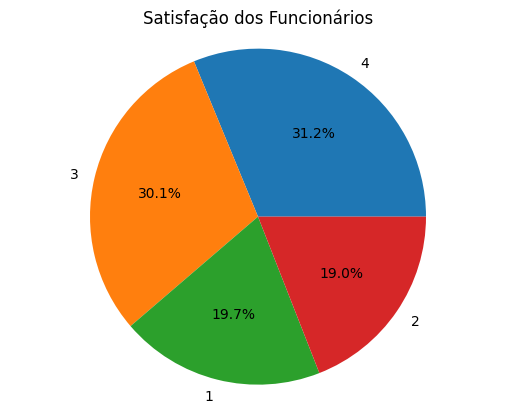

In [112]:
contagemSatisfação = df['JobSatisfaction'].value_counts()
plt.pie(contagemSatisfação, labels=contagemSatisfação.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Satisfação dos Funcionários')
plt.show()

Aqui está o gráfico de pizza que exibe o nível de satisfação dos funcionários:

* Podemos observar que a grande maioria dos funcionários está satisfeita com o trabalho que desempenha.

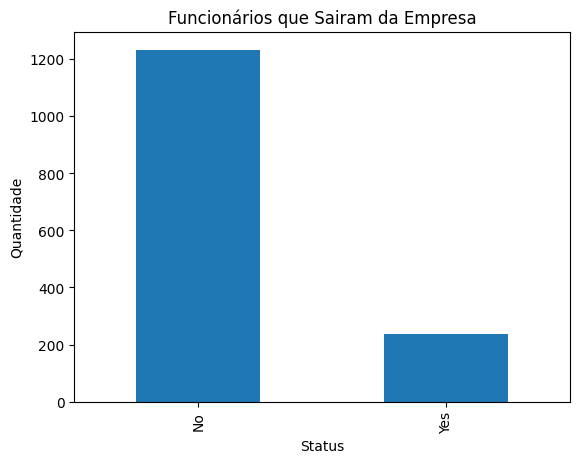

In [113]:
salarioDeCadaCargo = df['Attrition'].value_counts()
salarioDeCadaCargo.plot(kind='bar', title='Funcionários que Sairam da Empresa')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.show()

Aqui temos o gráfico que mostra a proporção de funcionários que deixaram a empresa:

* A maioria das pessoas ainda está na empresa.
* A minoria representa aqueles que já deixaram suas posições.

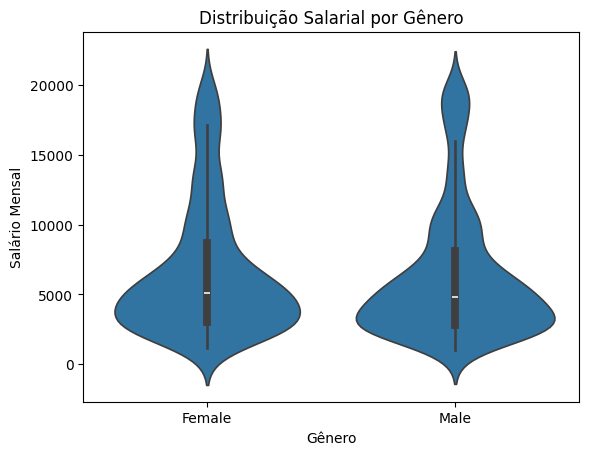

In [114]:
masculino = df[df['Gender'] == 'Male']['MonthlyIncome']
feminino = df[df['Gender'] == 'Female']['MonthlyIncome']
sns.violinplot(x='Gender', y='MonthlyIncome', data=df)
plt.title('Distribuição Salarial por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Salário Mensal')
plt.show()

Gráfico da distribuição salarial por gênero:

* Nos salários mais baixos, a distribuição é semelhante entre os gêneros.
* À medida que o salário aumenta, a distribuição tende a favorecer mais as mulheres.

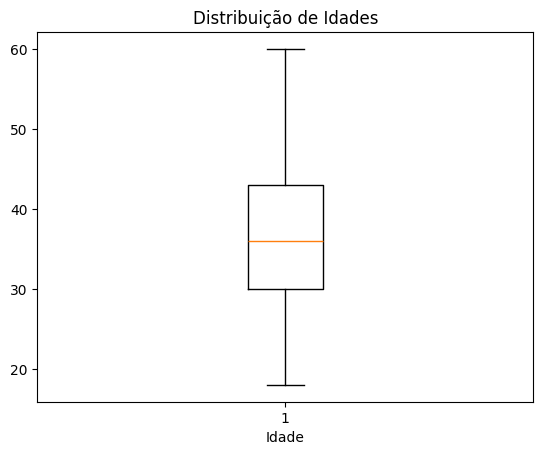

In [115]:
aMediaDeIdade = df['Age'].mean()
plt.boxplot(df['Age'])
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.show()

Gráfico de distribuição de idades:

* Podemos observar que a média está em torno de 36 anos.
* Não há anomalias significativas no conjunto de dados em relação à idade.